<a href="https://colab.research.google.com/github/maddara88/Deep_Learning_Project_Work/blob/main/Without_ImageDataGenerators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mv kaggle.json /root/.kaggle/

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:05<00:00, 220MB/s]
100% 812M/812M [00:05<00:00, 163MB/s]


In [ ]:
!unzip the data

unzip:  cannot find or open the, the.zip or the.ZIP.


In [ ]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip -q train.zip

In [ ]:
import os

In [ ]:
os.listdir("train") #what are the contents in train folder

['cat.5494.jpg',
 'cat.3470.jpg',
 'cat.8153.jpg',
 'cat.1870.jpg',
 'cat.2118.jpg',
 'cat.4713.jpg',
 'cat.1302.jpg',
 'cat.4591.jpg',
 'cat.9523.jpg',
 'dog.7481.jpg',
 'cat.1944.jpg',
 'cat.2986.jpg',
 'dog.5178.jpg',
 'cat.2679.jpg',
 'cat.12387.jpg',
 'cat.1717.jpg',
 'cat.10859.jpg',
 'cat.11499.jpg',
 'cat.5884.jpg',
 'dog.6704.jpg',
 'dog.1501.jpg',
 'cat.5502.jpg',
 'dog.11634.jpg',
 'cat.7811.jpg',
 'cat.2059.jpg',
 'dog.4756.jpg',
 'dog.6021.jpg',
 'cat.11268.jpg',
 'cat.1205.jpg',
 'dog.4151.jpg',
 'dog.11311.jpg',
 'cat.686.jpg',
 'dog.6891.jpg',
 'dog.5945.jpg',
 'dog.11962.jpg',
 'dog.10316.jpg',
 'cat.8530.jpg',
 'dog.3864.jpg',
 'cat.2532.jpg',
 'dog.7895.jpg',
 'cat.10419.jpg',
 'cat.5298.jpg',
 'dog.7211.jpg',
 'cat.9129.jpg',
 'cat.10733.jpg',
 'cat.2867.jpg',
 'cat.2143.jpg',
 'dog.10994.jpg',
 'cat.7018.jpg',
 'cat.8285.jpg',
 'dog.7224.jpg',
 'cat.8955.jpg',
 'dog.5118.jpg',
 'dog.12341.jpg',
 'dog.884.jpg',
 'cat.2341.jpg',
 'cat.9492.jpg',
 'dog.10903.jpg',
 'c

In [ ]:
len(os.listdir("train")) # there are 25000 images of dogs and cats

25000

In [ ]:
from PIL import Image

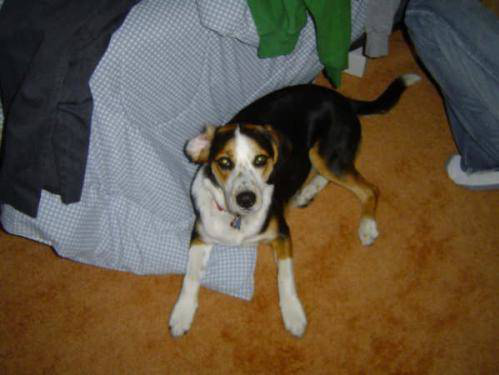

In [ ]:
Image.open("train/dog.27.jpg")

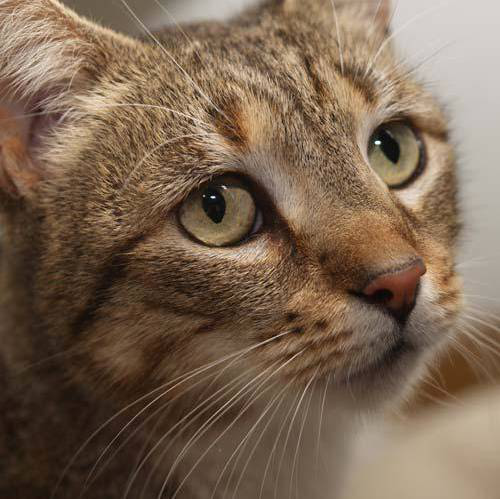

In [ ]:
Image.open("train/cat.54.jpg")

In [ ]:
import cv2

In [ ]:
print(f"the shape of cat image: {cv2.imread('train/cat.100.jpg').shape}")
print(f"the shape of dog image: {cv2.imread('train/dog.100.jpg').shape}")

the shape of cat image: (499, 403, 3)
the shape of dog image: (397, 500, 3)


In [ ]:
import os, cv2

x_train = []
y_train = []

for filename in os.listdir("train"):
  #read individual files
  image = cv2.imread("train/"+filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(150,150))
  x_train.append(image)
  if "cat" in filename:
    y_train.append(0)
  else:
    y_train.append(1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(25000, 150, 150, 3)
(25000,)


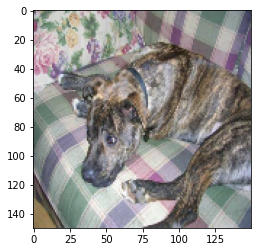

In [ ]:
plt.imshow(x_train[34])

In [ ]:
pets = {0:"cat",1:"dog"}

In [ ]:
pets[1]

'dog'

In [ ]:
import random
def show():
  plt.figure(figsize = (20,20))
  for i in range(5):
    plt.subplot(1,5,i+1)
    plt.subplots_adjust(wspace = .5,hspace =.5)
    r = random.randint(1,25000)
    plt.imshow(x_train[r])
    plt.title(pets[y_train[r]])

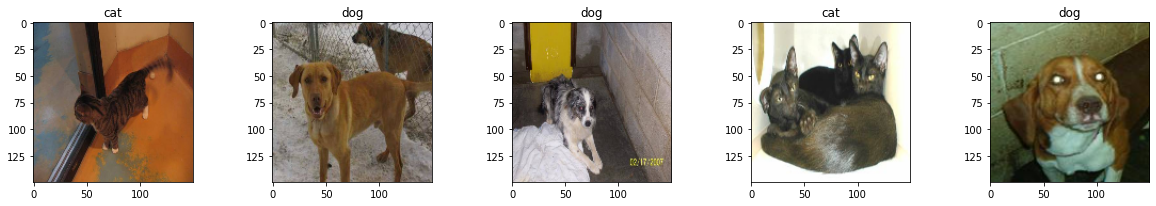

In [ ]:
show()

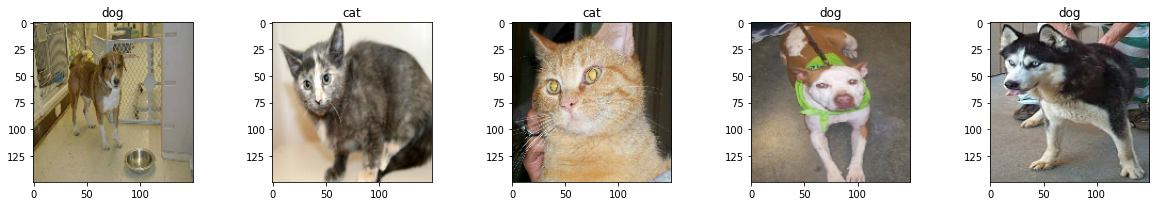

In [ ]:
show()

In [ ]:
#Splitting the data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,train_size = .3,random_state = 42)

In [ ]:
# scaling the data
x_train = x_train/255

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
# Model1
model1 = tf.keras.models.Sequential()

# Adding the first input layer and specifiying the input shape
model1.add(tf.keras.layers.Input((150,150,3),name= "Input"))

# Add the flatten layers to the model
model1.add(tf.keras.layers.Flatten(name = "Flat"))

# Hidden Layers  (Dense Layers)
model1.add(tf.keras.layers.Dense(128,activation = tf.keras.activations.relu, name = "Hidden_Layer"))


# Output Layer
model1.add(tf.keras.layers.Dense(2, activation = tf.keras.activations.softmax, name = "Output_Layer"))

# Now we are going to perform the back propagation to find the error and to adjust the weights 

model1.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer = tf.keras.optimizers.SGD(),
             metrics = "acc")

model1.fit(x = x_train,y = y_train,epochs = 17,validation_split = 0.1,batch_size=16)

Epoch 1/17
422/422 [==============================] - 16s 36ms/step - loss: 0.7760 - acc: 0.5381 - val_loss: 0.6881 - val_acc: 0.5453
Epoch 2/17
422/422 [==============================] - 15s 34ms/step - loss: 0.6750 - acc: 0.5747 - val_loss: 0.6748 - val_acc: 0.5813
Epoch 3/17
422/422 [==============================] - 15s 35ms/step - loss: 0.6671 - acc: 0.5889 - val_loss: 0.6709 - val_acc: 0.5947
Epoch 4/17
422/422 [==============================] - 15s 35ms/step - loss: 0.6596 - acc: 0.6077 - val_loss: 0.6610 - val_acc: 0.5827
Epoch 5/17
422/422 [==============================] - 15s 35ms/step - loss: 0.6572 - acc: 0.6064 - val_loss: 0.6627 - val_acc: 0.5880
Epoch 6/17
422/422 [==============================] - 15s 36ms/step - loss: 0.6508 - acc: 0.6163 - val_loss: 0.6625 - val_acc: 0.5933
Epoch 7/17
422/422 [==============================] - 15s 35ms/step - loss: 0.6447 - acc: 0.6244 - val_loss: 0.6658 - val_acc: 0.5973
Epoch 8/17
422/422 [==============================] - 15s 34ms

In [ ]:
# We have now created our model now lets test it with some images 

In [ ]:
# so here im gonna make a function where we just have to put the image locatoin and it should predict with accuracy if its a dog or a cat

In [ ]:
def identify(x):
  image = cv2.imread(x)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(150,150))
  print(plt.imshow(image))
  print(" ")
  #to convert our image to a 3d 
  image  = np.expand_dims(image,0)
  image = image/255.0
  y_pred = model1.predict(image)
  print((np.round(y_pred,2))*100)
  p = np.max((np.round(y_pred,2))*100)
  np.argmax((np.round(y_pred,2))*100)
  i = np.argmax((np.round(y_pred,2))*100)
  print(f"Hello sir, I'm {p}% sure that you have provided a picture of a {pets[i]} :)")

In [ ]:
# Random images

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 231ms/step
[[49. 51.]]
Hello sir, I'm 51.0% sure that you have provided a picture of a dog :)


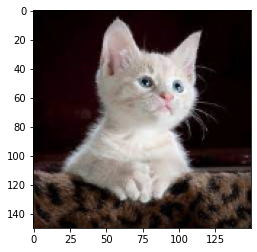

In [ ]:
identify("cat0.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 21ms/step
[[20. 80.]]
Hello sir, I'm 80.0% sure that you have provided a picture of a dog :)


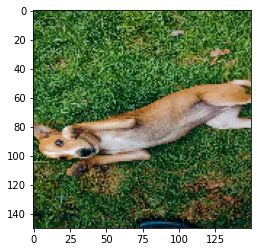

In [ ]:
identify("coco.jpg") #pet coco

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 21ms/step
[[64. 36.]]
Hello sir, I'm 64.0% sure that you have provided a picture of a cat :)


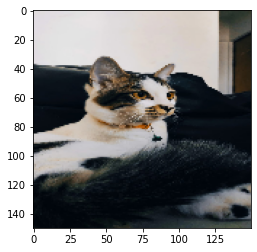

In [ ]:
identify("kaguya.jpg") # cocos rival

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 22ms/step
[[15.000001 85.      ]]
Hello sir, I'm 85.0% sure that you have provided a picture of a dog :)


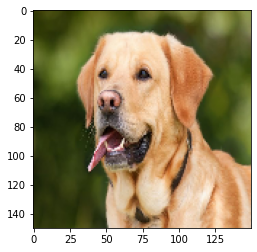

In [ ]:
identify("lab.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 21ms/step
[[37. 63.]]
Hello sir, I'm 63.0% sure that you have provided a picture of a dog :)


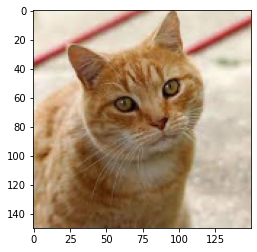

In [ ]:
identify("cat.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 22ms/step
[[32. 68.]]
Hello sir, I'm 68.0% sure that you have provided a picture of a dog :)


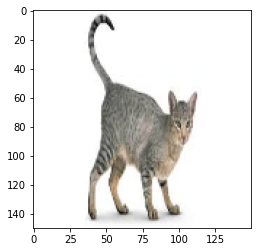

In [ ]:
identify("cat2.jpg")